<a href="https://colab.research.google.com/github/vilsonrodrigues/PegasusProject/blob/master/Pegasus_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando bibliotecas

In [0]:
import pandas as pd
import numpy as np
import networkx as nx

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import plotly.graph_objects as go

Leitura do CSV

In [43]:
tab = pd.read_csv("https://raw.githubusercontent.com/vilsonrodrigues/PegasusProject/master/Data%20Bases/submissoesDiferetesEIguaisA100.csv")
tab = tab.drop(columns={"Unnamed: 0"})
tab.head(1)

,idAluno,nota,situacao,submissões diferentes e iguais a 100% semana 1,submissões diferentes e iguais a 100% semana 2,submissões diferentes e iguais a 100% semana 3,submissões diferentes e iguais a 100% semana 4,submissões diferentes e iguais a 100% semana 5,submissões diferentes e iguais a 100% semana 6,submissões diferentes e iguais a 100% semana 7,submissões diferentes e iguais a 100% semana 8,submissões diferentes e iguais a 100% semana 9,submissões diferentes e iguais a 100% semana 10,submissões diferentes e iguais a 100% semana 11,submissões diferentes e iguais a 100% semana 12,submissões diferentes e iguais a 100% semana 13,submissões diferentes e iguais a 100% semana 14,submissões diferentes e iguais a 100% semana 15,submissões diferentes e iguais a 100% semana 16,submissões diferentes e iguais a 100% semana 17,submissões diferentes e iguais a 100% semana 18
0,5991cb910be9d42f2f68b906,7.9,APROVADO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23163 entries, 0 to 23162
Data columns (total 21 columns):
idAluno                                            23163 non-null object
nota                                               23163 non-null object
situacao                                           23163 non-null object
submissões diferentes e iguais a 100% semana 1     23163 non-null float64
submissões diferentes e iguais a 100% semana 2     23163 non-null float64
submissões diferentes e iguais a 100% semana 3     23163 non-null float64
submissões diferentes e iguais a 100% semana 4     23163 non-null float64
submissões diferentes e iguais a 100% semana 5     23163 non-null float64
submissões diferentes e iguais a 100% semana 6     23163 non-null float64
submissões diferentes e iguais a 100% semana 7     23163 non-null float64
submissões diferentes e iguais a 100% semana 8     23163 non-null float64
submissões diferentes e iguais a 100% semana 9     23163 non-null float64
submis

Instalando a SOM

In [45]:
!pip install minisom

Selecionando o df com o campo nota não nulo

In [0]:
tab = tab[tab["nota"] != '-']

In [47]:
tab.head()

,idAluno,nota,situacao,submissões diferentes e iguais a 100% semana 1,submissões diferentes e iguais a 100% semana 2,submissões diferentes e iguais a 100% semana 3,submissões diferentes e iguais a 100% semana 4,submissões diferentes e iguais a 100% semana 5,submissões diferentes e iguais a 100% semana 6,submissões diferentes e iguais a 100% semana 7,submissões diferentes e iguais a 100% semana 8,submissões diferentes e iguais a 100% semana 9,submissões diferentes e iguais a 100% semana 10,submissões diferentes e iguais a 100% semana 11,submissões diferentes e iguais a 100% semana 12,submissões diferentes e iguais a 100% semana 13,submissões diferentes e iguais a 100% semana 14,submissões diferentes e iguais a 100% semana 15,submissões diferentes e iguais a 100% semana 16,submissões diferentes e iguais a 100% semana 17,submissões diferentes e iguais a 100% semana 18
0,5991cb910be9d42f2f68b906,7.9,APROVADO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5991cb910be9d42f2f68b906,7.9,APROVADO,0.0,0.0,0.0,5.0,13.0,5.0,0.0,15.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5991cb910be9d42f2f68b906,7.9,APROVADO,0.0,0.0,0.0,5.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5991cb910be9d42f2f68b906,7.9,APROVADO,0.0,0.0,0.0,5.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5991cb910be9d42f2f68b906,7.9,APROVADO,0.0,0.0,0.0,5.0,13.0,5.0,0.0,15.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Convertendo notas para float

In [0]:
tab["nota"] = tab["nota"].astype(float)

Separando o X treino

In [0]:
X_train = tab.iloc[:, 3:].values

Normalizando dados

In [0]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)

Escolhendo o alvo, que será a nota final

In [51]:
Y_train = tab.iloc[:,1].values
Y_train

array([7.9, 7.9, 7.9, ..., 0. , 0. , 0. ])

Criando o modelo da SOM

In [0]:
tamanhoXdaRede = 13 
tamanhoYdaRede = 13
quantidadeCaracteristicas = 18

from minisom import MiniSom
som = MiniSom(x = tamanhoXdaRede, 
              y = tamanhoYdaRede, 
              input_len = quantidadeCaracteristicas,
              sigma = 1.0, 
              learning_rate = 0.5)

Treinando a rede SOM

In [127]:
som.train_random(data = X_train, 
                 num_iteration = 100000, 
                 verbose = True) 

#se verbose True ele imprime a cada iteração
#como eu uso o train_random tanto faz a sequência em que os dados estão

 [ 100000 / 100000 ] 100% - 0:00:00 left 
 quantization error: 4.057054530082256
 topographic error: 0.9921251519475714


Mapa de distância dos pesos

In [90]:
som.distance_map()

array([[0.24382124, 0.46077582, 0.4793904 , 0.49025924, 0.50011374,
        0.5066476 , 0.51410674, 0.53701778, 0.57167358, 0.37224179],
       [0.47921616, 0.79161854, 0.811269  , 0.81920123, 0.82913318,
        0.8413751 , 0.85984391, 0.89860514, 0.95141687, 0.58562275],
       [0.51222284, 0.83363593, 0.86007464, 0.86904668, 0.8736192 ,
        0.88152599, 0.90076017, 0.9426995 , 1.        , 0.63983886],
       [0.48115527, 0.78437654, 0.82600692, 0.84611134, 0.85184585,
        0.85606037, 0.87366341, 0.91638297, 0.97854091, 0.64152843],
       [0.38812289, 0.64406846, 0.70269287, 0.74052337, 0.75495436,
        0.757965  , 0.77085556, 0.81097689, 0.87738923, 0.58268403],
       [0.27243822, 0.46790409, 0.53601624, 0.58862587, 0.61523433,
        0.62256716, 0.63289555, 0.66803606, 0.73175774, 0.48587132],
       [0.17562356, 0.31746922, 0.38497289, 0.44362869, 0.48065093,
        0.4974337 , 0.51064019, 0.54001222, 0.59150627, 0.38511998],
       [0.11246007, 0.21638546, 0.2776125

Obtem o vetor de pesos da rede treinada 

In [0]:
pesos = som.get_weights()

Criando uma lista com as semanas 

In [136]:
colunas = []
for i in range(1,19):
  colunas.append("Semana "+str(i))
print(colunas)

['Semana 1', 'Semana 2', 'Semana 3', 'Semana 4', 'Semana 5', 'Semana 6', 'Semana 7', 'Semana 8', 'Semana 9', 'Semana 10', 'Semana 11', 'Semana 12', 'Semana 13', 'Semana 14', 'Semana 15', 'Semana 16', 'Semana 17', 'Semana 18']


Montando matrizes para total de ocorrências, uma para aprovados e outra para reprovados

In [0]:
# matriz de zeros para contador de reprovados 
MContRe = np.zeros((tamanhoXdaRede,tamanhoYdaRede))
# matriz de zeros para contador de aprovados 
MContAp = np.zeros((tamanhoXdaRede,tamanhoYdaRede))
# matriz de zeros para o número total de alunos
MContT = np.zeros((tamanhoXdaRede,tamanhoYdaRede))

cont = 0; 

for x in X_train: 
  pos = som.winner(x)
  if (Y_train[cont] < 5): #Reprovado 
    MContRe[pos] += 1
  if (Y_train[cont] >= 5): #Aprovado 
    MContAp[pos] += 1    
  MContT[pos] += 1
  cont= cont+1

In [138]:
print(MContT.astype(int))

[[ 118   14  245  197   54   16 5467    0  387  405  104  100   36]
 [  23   78   42   16  246  180   92  184  211   31   64   99   33]
 [ 123   56    8  129   65   34  105  151  282  128   49   76   30]
 [  98   77  409   14   96  221  241  111  213  108  117   93   43]
 [ 115  146   45  211   54  189   36   65  148   77   85   92   48]
 [  65   98   95  244  115   16   19  137   57   39   32   66   32]
 [ 121   47   81  103  101   74   68   48   54   81   13   27   65]
 [  35   57   62   90   78   31   53   30   65   56   77   58   26]
 [  29   90   56   80   63   84   26   74    6  113   68   43   40]
 [  73   21   13   57   69   44   62   21   55   38  127   38   48]
 [  36   29   59   47   48   61   70  104   59   69   39   75   69]
 [  12   66    0   44   44   57   88   54   72   47   69    6   65]
 [  75   94   25   40   65   34   22   62   41   45   62   57   26]]


In [139]:
print(MContRe.astype(int))

[[   5   13   98  101   15    1 2200    0  231  138   37    0    0]
 [   3   34    7    0   59  101   36  120  103   20    0    0    0]
 [   3    2    0   15   22   16   51   71   84   19    0    0    0]
 [  19   40  163    0   20   41  130   77   85   34   17    0    0]
 [  55   76    1   33   13   14    7   16   64    0    0    0    0]
 [  12    0   12  105   34    1    9    4    0   26    0    1    0]
 [  18    6   26   18   20   18    0    8    0   30    0    0    0]
 [   0   14    0   14   14    0    0    0   14   31    0    1    0]
 [   0    0    0    0   14    7    0    0    0   39    0    0    4]
 [  16    0    0    0    0    6    0    0    0    0   66    0   13]
 [   0    0    0    0    0   18    0   55   33    8    0   14   26]
 [   2    0    0    0    0   24   24    0   12    0   12    0    0]
 [  30   13    0    0    0    0    0   24   12    0    0    0    0]]


Função para retornar as ocorrências na plataforma lop

In [0]:
def buscarTrajetoria(id):
  return tab.loc[tab["idAluno"]==id,:]

Função para normalizar dados

In [0]:
def normalizaDados(data):
  from sklearn.preprocessing import StandardScaler
  sc = StandardScaler()
  dt = sc.fit_transform(data)
  return dt

Função de criação de gráfico de superfície

In [0]:
def chamaGraficoDeSuperficie(data):
  z_data = normalizaDados(data)
  fig = go.Figure(data=[go.Surface(z=z_data)])
  fig.update_layout(title="Gráfico de superfície - Reprovados", autosize=False,
                    width=750, height=600,
                    margin=dict(l=65, r=50, b=65, t=90))
  fig.show()  

Função para chamar gráfico de pizza 

In [0]:
def chamaGraficoDePizzaDeSituacoes():
  fig = plt.figure(figsize=(10,5))
  cont = 1;
  for i in range(len(MContT)):
    for j in range(len(MContT)):
      plt.subplot(tamanhoXdaRede,tamanhoYdaRede,cont)
      cont=cont+1
      sizes = [MContAp[i][j],MContT[i][j]-MContAp[i][j]]
      plt.pie(sizes)
  #plt.set_title("Gráfico de % de aprovados e reprovados em cada neurônio")
  plt.show()

Função para exibir atributos de um neurônio específico 

In [0]:
def exibeNeuronio(linha,coluna,peso): 
  fig = plt.figure()
  ax = fig.add_axes([0.1,0.1,1.5,1.5])
  ax.bar(colunas, peso[linha,coluna,:], color="y")
  plt.xticks(rotation=90)
  ax.set_title("Especificação do Neurônio " + str(linha) + "," + str(coluna))
  plt.ylim((0,1))
  plt.show()

Função para consultar a proporção de aprovados e reprovados e retornar uma cor 

In [0]:
def consultaProporcao(posAnt):
  div = (MContRe[posAnt] / MContT[posAnt])
  if(div > 0.20 ):
    return "r"
  elif(div < 0.10 ):
    return "#2ECC71"
  else:
    return "#FFFF00"
#As proporções escolhidas foram: se existe até 10% de reprovados você está numa região segura, a cor escolhida é verde
#se você está numa região entre 10% a 20% de reprovados, então você está amarelo, seria um alerta
#se você está cima de 20% nesse neurônio você está vermelho

Função para inserir estados no node

In [0]:
def insereAtributo(G, pos, cont):
  var = []
  semanas = []
  try: 
    atributos = nx.get_node_attributes(G, "semana")
    for i in atributos[pos]:
        var.append(i)
  except:
    pass
  for i in var:
       semanas.append(i)
  semanas.append(cont)   
  G.nodes[pos]["semana"] = semanas
  return G

#O objetivo é fazer uma lista de atributos, sendo que irá conter as semanas que caíram naquele neurônio
#eu faço uma try catch para verificar se está vazio o atributo desse neuronio, como não existe uma função expecifica para verificar isso
#acabo tendo que utiliza-lo. Se não estiver vazio ele recebe a lista e depois faz a consulta desse valor
#depois recebe o atual e insere 

Função para exibir qual foi a semana que caiu no neurônio

In [0]:
def verificaSemanasNoNeuronio(G,x,y):
  print("Semana(s) que caíram no neurônio " + str(G.nodes[(x,y)]["semana"]))

Legendas para o grafo

In [0]:
def legendasDoGrafo():
  legend_elements = [Line2D([0], [0], marker = "x", color = "w", label = "% de reprovados por neurônio", markerfacecolor = "black", markersize = 15),
                     Line2D([0], [0], marker = "o", color = "w", label = "Até 10%", markerfacecolor = "g", markersize = 15),
                     Line2D([0], [0], marker = "o", color = "w", label = "Entre 10% e 20%", markerfacecolor = "#FFFF00", markersize = 15),
                     Line2D([0], [0], marker = "o", color = "w", label = "Acima de 20%", markerfacecolor = "r", markersize = 15),
                     Line2D([0], [0], marker = "x", color = "w", label = "------------------------------------------", markerfacecolor = "black", markersize = 15),
                     Line2D([0], [0], marker = "o", color = "w", label = "Posição do neurônio inicial e final", markerfacecolor = "#00FFFF", markersize = 15),
                    ]                  
  return legend_elements

Estrutura para o grafo

In [0]:
def criaEstruturaDoGrafo(G, color_map):
  fig, ax = plt.subplots(figsize = (15, 10))
  legend_elements = legendasDoGrafo()
  plt.title("Grafo da trajetória de iteração de um aluno na disciplina de LOP")  
  ax.legend(handles = legend_elements, loc = "upper left")
  nx.draw(G, with_labels = True, node_color = color_map, node_size = 4000, font_weight = "bold", ax = ax)
  plt.show()

Função para criar o grafo de um determinado aluno

In [0]:
def criaGrafo(listIteravel, limite): #Atributo limite vai ser o número maximo de semanas
  G = nx.DiGraph()
  color_map = [] #Lista para cores dos Nodes
  lista = [] #Lista para conter as posições que já saíram, isso foi feito porque pode haver reposição de Nodes, ai quando adicionasse as cores se repeteria e
  cont = 0   #o python reclaria de estouro, já que se existem 6 nodes, não faz sentido passar 8 parâmetros

  for x in listIteravel: 
    pos = som.winner(x)
    if(cont > 0):
      G.add_edge(posAnt, pos)
      G = insereAtributo(G, pos, cont) #continua aqui <<<<<<<
    if(cont == 0):
      color_map.append(consultaProporcao(pos))    
    elif(pos not in lista):
      color_map.append(consultaProporcao(pos))    
    cont += 1
    if(cont == (limite+1)):
      break
    posAnt = pos
    lista.append(pos)

  #G.add_node(("> ") + str(lista[0]) + (" <")) #esse Node sobrando vai me informar a coordenada inicial
  G.add_node(str(lista[0]) + " - " + str(lista[limite-1])) #esse Node sobrando vai me informar a coordenada inicial e final
  color_map.append("#00FFFF") #será em cor azul
  criaEstruturaDoGrafo(G, color_map)
  return G

Aplicando a desnormalização para obter valores próximos aos originais depois de ter treinado a SOM

In [0]:
X_test = min_max_scaler.inverse_transform(X_train_minmax)
pesos_desnormalizados = min_max_scaler.inverse_transform(pesos[29])
X_test

Verificando a situação de um aluno através de um grafo

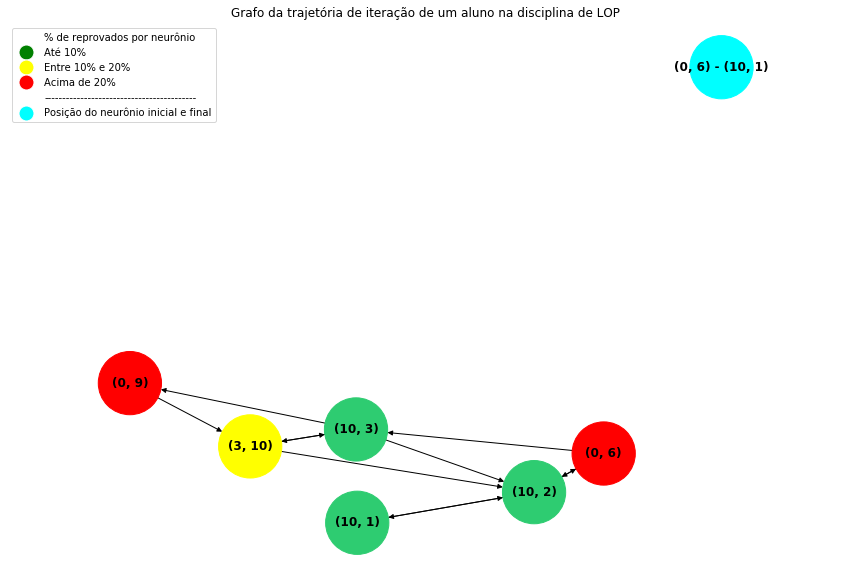

In [141]:
Grafo = criaGrafo(X_train,18)

In [142]:
verificaSemanasNoNeuronio(Grafo,10,1)

Semana(s) que caíram no neurônio [6, 7, 17, 18]


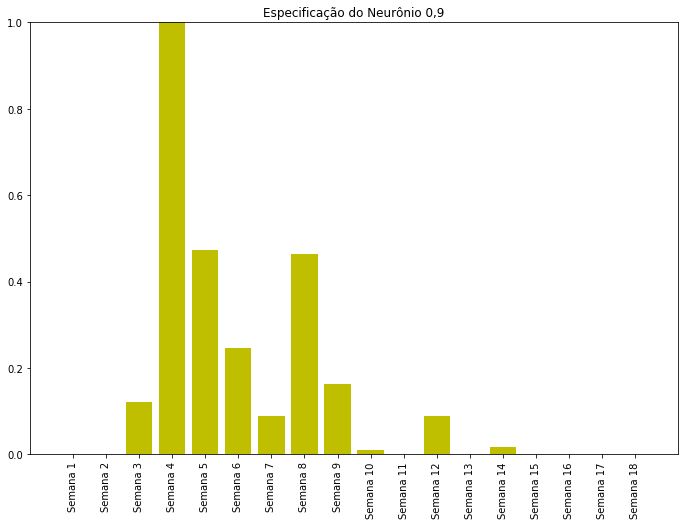

In [144]:
exibeNeuronio(0,9,pesos) 

Gráfico de superfície

In [145]:
chamaGraficoDeSuperficie(MContRe)

Gráfico de Pizza das situações 

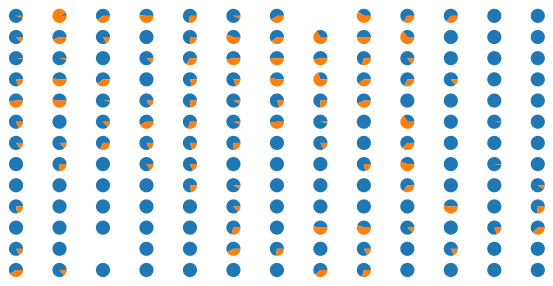

In [146]:
chamaGraficoDePizzaDeSituacoes()

In [38]:
print(MContT.astype(int))

[[ 243  221  198  104  107  243  118  439]
 [ 213  134  141  115   57  281   45  171]
 [ 112  188  290  192  188  129  337  141]
 [ 385  179  366  251    6  130    9  418]
 [ 225  231  247  115  401  286  202  138]
 [ 467  132  124   70   58    3  256  514]
 [ 218  137  160  179  124    9  125   32]
 [ 371  245  321  523  535  407  106 5809]]


In [129]:
tab.head(5)

,idAluno,nota,situacao,submissões diferentes e iguais a 100% semana 1,submissões diferentes e iguais a 100% semana 2,submissões diferentes e iguais a 100% semana 3,submissões diferentes e iguais a 100% semana 4,submissões diferentes e iguais a 100% semana 5,submissões diferentes e iguais a 100% semana 6,submissões diferentes e iguais a 100% semana 7,submissões diferentes e iguais a 100% semana 8,submissões diferentes e iguais a 100% semana 9,submissões diferentes e iguais a 100% semana 10,submissões diferentes e iguais a 100% semana 11,submissões diferentes e iguais a 100% semana 12,submissões diferentes e iguais a 100% semana 13,submissões diferentes e iguais a 100% semana 14,submissões diferentes e iguais a 100% semana 15,submissões diferentes e iguais a 100% semana 16,submissões diferentes e iguais a 100% semana 17,submissões diferentes e iguais a 100% semana 18
0,5991cb910be9d42f2f68b906,7.9,APROVADO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5991cb910be9d42f2f68b906,7.9,APROVADO,0.0,0.0,0.0,5.0,13.0,5.0,0.0,15.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5991cb910be9d42f2f68b906,7.9,APROVADO,0.0,0.0,0.0,5.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5991cb910be9d42f2f68b906,7.9,APROVADO,0.0,0.0,0.0,5.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5991cb910be9d42f2f68b906,7.9,APROVADO,0.0,0.0,0.0,5.0,13.0,5.0,0.0,15.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#Função nova a ser concluída

In [0]:
teste = tab.iloc[4,3:]
teste2 = tab.iloc[4,3:9]

In [131]:
a = pd.DataFrame.from_dict(teste)
a = a.T
b = pd.DataFrame.from_dict(teste2)
b = b.T
ab = pd.concat([a,b],sort=0)
ab

,submissões diferentes e iguais a 100% semana 1,submissões diferentes e iguais a 100% semana 2,submissões diferentes e iguais a 100% semana 3,submissões diferentes e iguais a 100% semana 4,submissões diferentes e iguais a 100% semana 5,submissões diferentes e iguais a 100% semana 6,submissões diferentes e iguais a 100% semana 7,submissões diferentes e iguais a 100% semana 8,submissões diferentes e iguais a 100% semana 9,submissões diferentes e iguais a 100% semana 10,submissões diferentes e iguais a 100% semana 11,submissões diferentes e iguais a 100% semana 12,submissões diferentes e iguais a 100% semana 13,submissões diferentes e iguais a 100% semana 14,submissões diferentes e iguais a 100% semana 15,submissões diferentes e iguais a 100% semana 16,submissões diferentes e iguais a 100% semana 17,submissões diferentes e iguais a 100% semana 18
4,0,0,0,5,13,5,0,15,9,0,0,0,0,0,0,0,0,0
4,0,0,0,5,13,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
def quebraLinhas(aluno):
  table = pd.DataFrame(columns=tab.iloc[:,3:].columns)
  tbInteira = pd.DataFrame.from_dict(aluno)
  tbInteira = tbInteira.T
  for i in range(1,18):
    teste = tbInteira.iloc[:i]
    teste = teste.T
    table = pd.concat([table,a], sort=0,ignore_index = True)
    teste = tab.iloc[4,3:]  